In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
from img_bmp_utils import read_cmp_npy
from cmap_splitter import CmapSplitter
from gaussian_classifier import SegmentaionMap

## Splitting Predictions per class

In [3]:
# DATASET_DIR = pathlib.Path(input("Enter image dir:"))
DATASET_DIR = pathlib.Path(pathlib.Path.cwd() / 'data/trained_model')

# Loading image, annotation array
ann_arr = read_cmp_npy(DATASET_DIR)

Annotation array: (30, 128, 128)


In [4]:
out_config = [128,128]
ann_obj = CmapSplitter(ann_arr)

In [5]:
# y_offsets = [0, 0, 105, 100]
# height_list = [110, 100, 
#             ann_arr.shape[1] - y_offsets[2],
#             ann_arr.shape[1] - y_offsets[3]]

# x_offsets = [0, 115, 0, 120]
# width_list  = [110, 
#             ann_arr.shape[2] - x_offsets[2],
#             120,
#             ann_arr.shape[2] - x_offsets[3]]

# split_config = [y_offsets, height_list, x_offsets, width_list]

In [6]:
# MAKE SCALING BY FRACTION!!

height_list = [80,72,115,115]
width_list  = [96,100,110,120]
x_offsets = [25, 115, 15, 115]
y_offsets = [25, 25, 105, 100]

y_offsets = [0, 0, 105, 100]
height_list = [110,100,115,115]

x_offsets = [0, 115, 0, 120]
width_list  = [110,100,120,120]

split_config = np.array([y_offsets, height_list, x_offsets, width_list]) / 2

split_config = list(np.array(split_config, dtype=int))

In [7]:
# sample = ann_obj.split_to_4(split_config)
pred_arr = ann_obj.split_to_4(split_config)

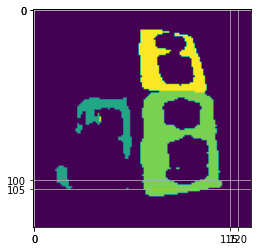

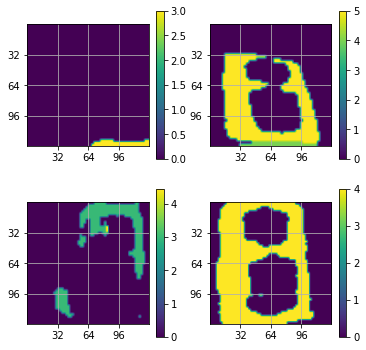

In [8]:
# Sample
i = 2
plt.imshow(ann_arr[i])
plt.grid('on')
plt.xticks(x_offsets)
plt.yticks(y_offsets)

j = i * 4
plt.figure(figsize=(6,6))
for k in range(4):
    plt.subplot(2,2,k+1)
    plt.imshow(pred_arr[j+k,:])
    plt.grid('on')
    plt.xticks([32,64,96])
    plt.yticks([32,64,96])
    plt.colorbar()

plt.show()

## Segmentation Maps

In [9]:
segmap_arr = SegmentaionMap(pred_arr)

In [10]:
# Testing get_density()
segmap_densities = segmap_arr.get_density()
print(segmap_densities.shape)
print(np.around(segmap_densities[:, :], 3)  *100)

(120, 7)
[[98.6  0.2  0.2  0.3  0.7  0.   0. ]
 [67.9  2.2  2.   2.2  2.9 22.7  0. ]
 [55.1  2.2  3.3  3.1 36.2  0.   0. ]
 [79.   4.   4.  10.9  1.8  0.5  0. ]
 [99.2  0.3  0.3  0.3  0.   0.   0. ]
 [65.   1.9  2.3  2.1  2.9 25.5  0.2]
 [73.1  3.6  3.9 19.5  0.   0.   0. ]
 [50.5  2.7  3.2  3.4 40.2  0.1  0. ]
 [97.9  0.3  0.4  1.3  0.   0.   0. ]
 [66.3  1.6  2.1  1.7  5.  23.4  0. ]
 [85.5  2.1  2.1 10.2  0.1  0.   0. ]
 [52.8  2.5  2.2  3.4 39.1  0.   0. ]
 [81.8  2.5  2.8 12.8  0.   0.   0. ]
 [71.8  3.1  2.9  4.8 17.5  0.   0. ]
 [94.8  1.3  1.2  0.7  0.8  0.6  0.7]
 [53.8  3.1  2.1  3.1  3.4 34.5  0. ]
 [85.5  2.1  2.7  9.8  0.   0.   0. ]
 [68.7  2.5  2.3  3.5 23.   0.   0. ]
 [97.8  0.5  0.3  0.6  0.1  0.2  0.5]
 [57.4  2.1  1.8  2.1  2.9 33.7  0. ]
 [84.9  2.6  2.9  9.6  0.   0.   0. ]
 [67.1  2.3  2.   3.3 25.3  0.   0. ]
 [80.7  5.1 14.1  0.1  0.   0.   0. ]
 [65.3 33.8  0.9  0.   0.   0.   0. ]
 [77.2  3.4  6.2 13.2  0.   0.   0. ]
 [67.2  3.4  2.9  3.6 22.9  0.   0. ]
 [7

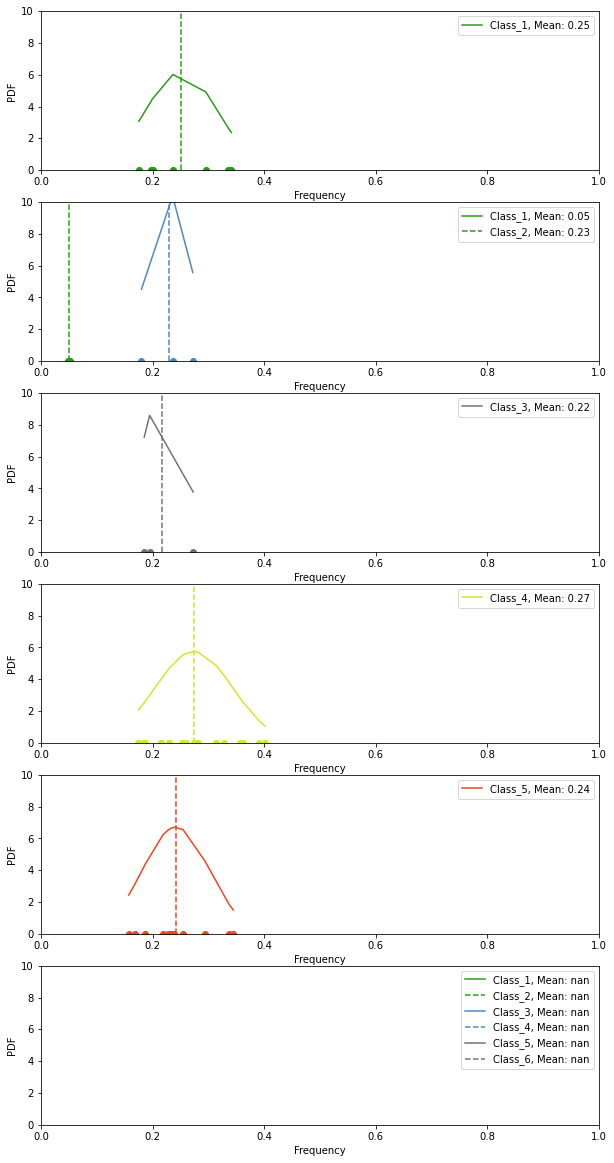

In [11]:
segmap_arr.show_batch_dist(False, max_y_limit=10, plot_type='a')

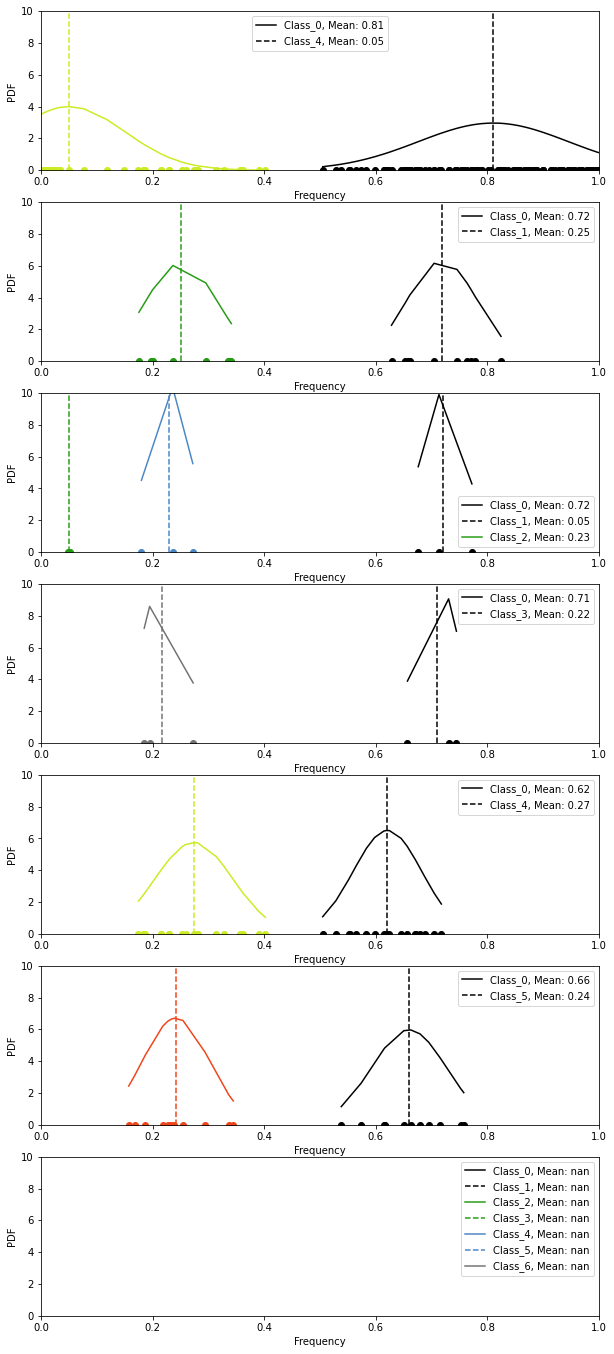

In [12]:
segmap_arr.show_batch_dist(True, max_y_limit=10, plot_type='a')

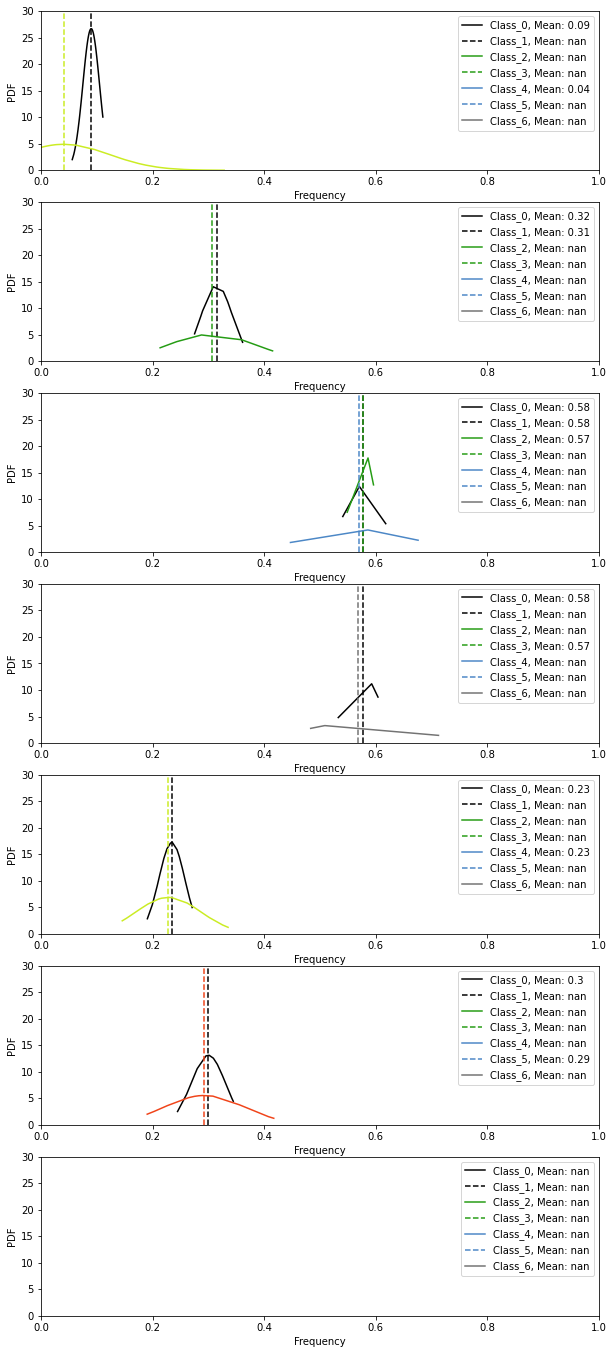

In [13]:
segmap_arr.show_batch_dist(True, max_y_limit=30, plot_type='b')